--- 
title: "ISLR in Python"  
date: 2019-07-05
description: "Python implementation of the code in ISLR" 
draft: false 
tags:
- python
---

These are my notes and code in python as I read through [An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/). The book is in R, I prefer python so here goes.

In [14]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# 1. Introduction

## Data Sets

The books uses [a few different data sets](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) and chp 1 introduces three of them:

### Wages

In [80]:
df = pd.read_csv("data/Wage.csv")
df["education_level"] = df["education"].apply(lambda x: int(x.split(".")[0]))
df.head(2)

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,education_level
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,1
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,4


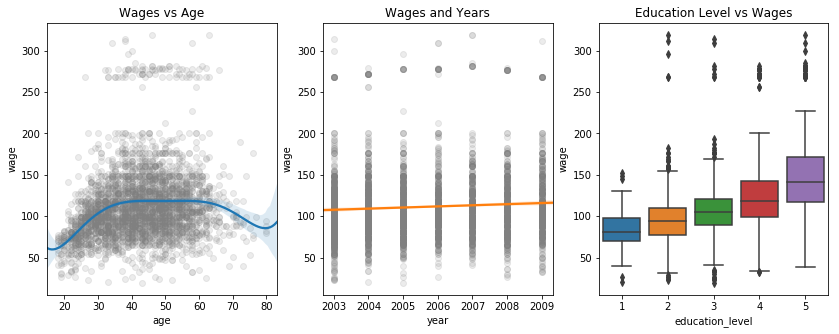

In [88]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

# Ax1: Wage vs Age scatterplot and trend line
sns.regplot(x="age", y="wage", order=6, data=df, ax=axes[0], 
            scatter_kws={'alpha':0.15, "color": "grey"})

axes[0].set_title("Wages vs Age")

# Ax2: Wage per Year
axes[1].set_title("Wages and Years")
sns.regplot(x="year", y="wage", data=df, order=1, ax=axes[1], 
            scatter_kws={'alpha':0.15, "color": "grey"})

# Ax3: Wage per Year
axes[2].set_title("Education Level vs Wages")
sns.boxplot(x="education_level", y="wage", data=df, ax=axes[2]);

### Stock Market Data

This has the daily movements in the Standard & Poor’s 500 (S&P) stock index over a 5-year period between 2001 and 2005.

In [3]:
df = pd.read_csv("data/Smarket.csv")
df.head(2)

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up


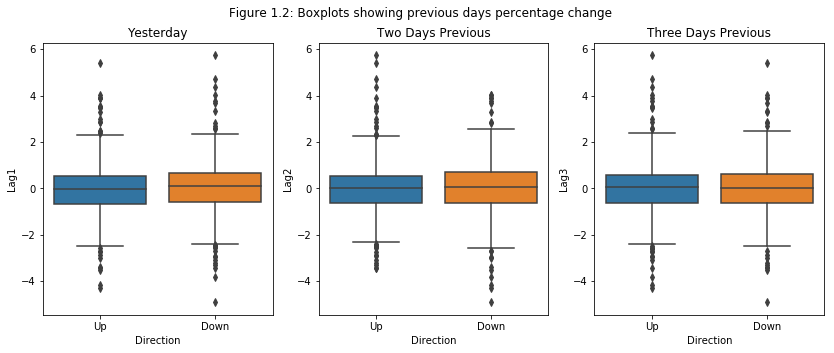

In [13]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

fig.suptitle("Figure 1.2: Boxplots showing previous days percentage change")

axes[0].set_title("Yesterday")
sns.boxplot(x="Direction", y="Lag1", data=df, ax=axes[0])

axes[1].set_title("Two Days Previous")
sns.boxplot(x="Direction", y="Lag2", data=df, ax=axes[1])

axes[2].set_title("Three Days Previous")
sns.boxplot(x="Direction", y="Lag3", data=df, ax=axes[2]);

### Gene Expression Data

This contains 6,830 gene expression measurements for each of 64 cancer cell lines.

In [66]:
gene = pd.read_csv("data/NCI60_X.csv")
gene.head(2)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-0.070000,0.350000,-0.315000,-0.450000,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,0.579961,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039


In [67]:
gene_y = pd.read_csv("data/NCI60_y.csv")
gene_y.head(2)

,Unnamed: 0,x
0,1,CNS
1,2,CNS


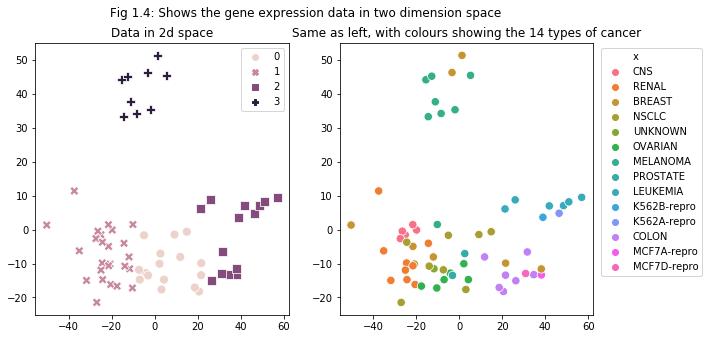

In [119]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
X = pca.fit_transform(gene.iloc[:,1:].values)
x = X[:,0]
y = X[:,1]

k_means = KMeans(n_clusters=4)
k_means.fit(X) 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Fig 1.4: Shows the gene expression data in two dimension space")

ax1.set_title("Data in 2d space")
sns.scatterplot(x, y, ax=ax1, style=k_means.labels_, hue=k_means.labels_, s=80)

ax2.set_title("Same as left, with colours showing the 14 types of cancer")
sns.scatterplot(x, y, ax=ax2, hue=gene_y.x, s=70)
ax2.legend(bbox_to_anchor=(1.45, 1), ncol=1);